In [2]:
import glob
import os
import pandas as pd
import numpy as np
import re
from shutil import copyfile
os.getcwd()
main_dir = '/projects/cgr/users/cgr-ds/drugnome-ai/drug/drugnomeAI/outputs'
pharos_dir = os.path.join(main_dir, 'pharos_labels/')
tier_dir = os.path.join(main_dir, 'tier_labels/')
print(pharos_dir, tier_dir)

/projects/cgr/users/cgr-ds/drugnome-ai/drug/drugnomeAI/outputs/pharos_labels/ /projects/cgr/users/cgr-ds/drugnome-ai/drug/drugnomeAI/outputs/tier_labels/


In [4]:
tier_files = glob.glob(tier_dir + "*/supervised-learning/Avg_AUC_per_classifier.txt")
# tier_files

In [5]:
pharos_files = glob.glob(pharos_dir + "*/supervised-learning/Avg_AUC_per_classifier.txt")
# pharos_files

In [6]:
tclin_tier = '/projects/cgr/users/cgr-ds/drugnome-ai/drug/drugnomeAI/outputs/Tclin_Tier1_union/supervised-learning/Avg_AUC_per_classifier.txt'

In [7]:
files = pharos_files + tier_files + [tclin_tier]
files

['/projects/cgr/users/cgr-ds/drugnome-ai/drug/drugnomeAI/outputs/Tclin_Tier1_union/supervised-learning/Avg_AUC_per_classifier.txt']

In [ ]:
r = pd.DataFrame(columns = ['model', 'AUC', 'source'])
for path in files:
    data = pd.read_csv(path, header=None, index_col=False, sep='\t', names=['model', 'AUC'])
    path = path.split('/')[-3]#.strip("outputs\\")
    data['source'] = path
    r = r.append(data)

In [9]:
r

,model,AUC,source


In [10]:
r.to_csv('AUC_results.csv', index=False)

In [1]:
import pandas as pd
import numpy as np
from plotnine import ggplot, ggsave, geom_point, aes, \
stat_smooth, facet_wrap, geom_bar, stat_count, facet_grid, geom_col, theme_light, theme, xlab, ylab, scale_color_brewer, \
theme_classic, theme_minimal, scale_fill_manual, element_text, labs
from plotnine.data import mpg

In [2]:
data = pd.read_csv('AUC_results.csv')
data.rename(columns={"source":"label"}, inplace=True)

In [3]:
data.sort_values('AUC', ascending=False)

,model,AUC,label
0,GradientBoostingClassifier,0.990397,Tclin
1,RandomForestClassifier,0.987139,Tclin
2,ExtraTreesClassifier,0.977323,Tclin
3,SVC,0.973103,Tclin
24,GradientBoostingClassifier,0.969185,Tclin_Tier1_union
8,GradientBoostingClassifier,0.967148,Tchem_Tclin
20,GradientBoostingClassifier,0.966685,Tier1
25,RandomForestClassifier,0.963865,Tclin_Tier1_union
9,RandomForestClassifier,0.962014,Tchem_Tclin
21,RandomForestClassifier,0.959874,Tier1


In [4]:
pharos = ['Tclin', 'Tchem_Tclin', 'Tchem']
tiers = ['Tier1', 'Tier1_Tier2', 'Tier1_Tier2_Tier3A']
union = ['Tclin_Tier1_union']
data['label_type'] = ['pharos' if x in pharos else 'tier' if x in tiers else 'union' for x in data.label]
label_types = data.label_type.unique().tolist()
# data.replace('inter', 'InterPro', inplace=True)
# data.replace('pharos-inter', 'Pharos+InterPro', inplace=True)
# data.replace('all-mantis', 'All+Mantis', inplace=True)
# data.replace('all', 'All', inplace=True)
data

,model,AUC,label,label_type
0,GradientBoostingClassifier,0.990397,Tclin,pharos
1,RandomForestClassifier,0.987139,Tclin,pharos
2,ExtraTreesClassifier,0.977323,Tclin,pharos
3,SVC,0.973103,Tclin,pharos
4,GradientBoostingClassifier,0.946311,Tchem,pharos
5,RandomForestClassifier,0.939373,Tchem,pharos
6,ExtraTreesClassifier,0.915215,Tchem,pharos
7,SVC,0.898411,Tchem,pharos
8,GradientBoostingClassifier,0.967148,Tchem_Tclin,pharos
9,RandomForestClassifier,0.962014,Tchem_Tclin,pharos


/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 8 x 5 in image.
/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: auc_bars.png
/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 8 x 5 in image.
/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: auc_bars.pdf


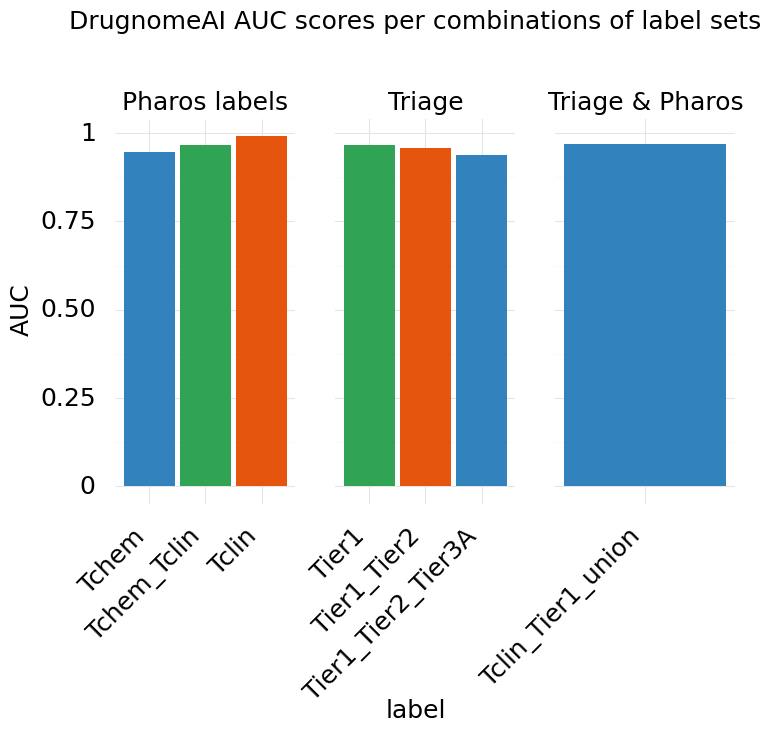

<ggplot: (8789887953201)>

In [14]:
data1 = data.replace({'pharos': 'Pharos labels', 'tier': 'Triage', 'union': 'Triage & Pharos'})
data2 = data1.loc[data1['model'] == 'GradientBoostingClassifier']

p = ggplot(data2) + geom_col(aes(x='label', y='AUC', fill='label'), stat="identity", position='dodge', show_legend = False)\
+ facet_grid("~label_type", scales="free", space="free")\
+ theme_minimal() \
+ scale_fill_manual(values=['#3182bd', '#31a354', '#e6550d', '#3182bd', '#31a354', '#e6550d', '#3182bd']) + theme(subplots_adjust={'hspace':0.30}) \
+ theme(panel_spacing=0.4, figure_size=(8,5), axis_text_x=element_text(rotation=45, hjust=1, size=18, colour='black'), \
       strip_text_x = element_text(size = 18, colour = "black"), \
       axis_text_y=element_text(hjust=1, size=18, colour='black'),)\
+ theme(axis_title_y=element_text(size=18,color="black")) \
+ theme(axis_title_x=element_text(size=18,color="black")) \
+ labs(title="DrugnomeAI AUC scores per combinations of label sets\n\n") \
+ theme(title=element_text(size=18,color="black"))
ggsave(plot=p,filename="auc_bars.png")
ggsave(plot=p,filename="auc_bars.pdf")
p

/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 8 x 5 in image.
/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: auc_bars_all_models.png
/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 8 x 5 in image.
/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: auc_bars_all_models.pdf


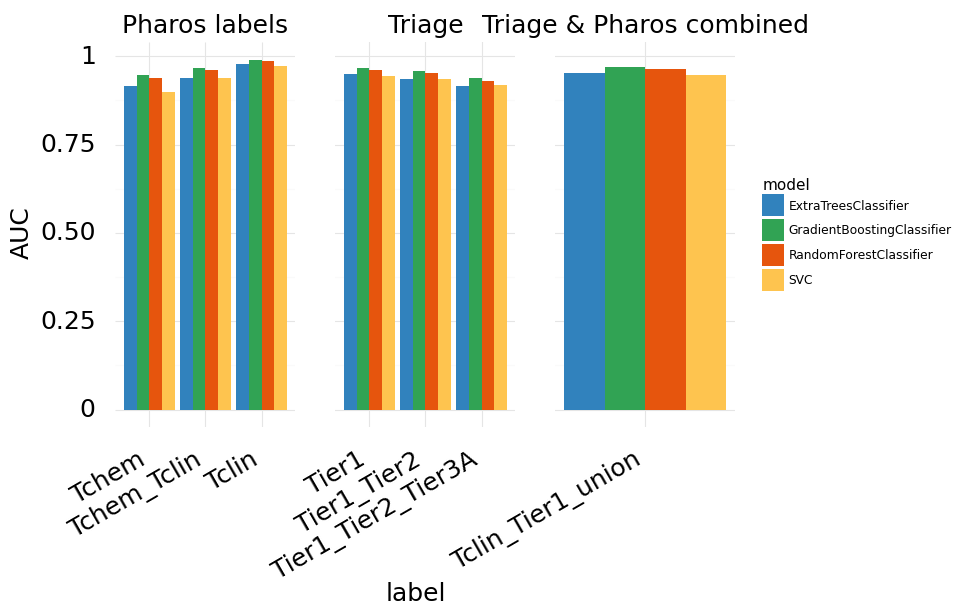

<ggplot: (8793061131397)>

In [14]:
data1 = data.replace({'pharos': 'Pharos labels', 'tier': 'Triage', 'union': 'Triage & Pharos combined'})

p = ggplot(data1) + geom_col(aes(x='label', y='AUC', fill='model'), stat="identity", position='dodge', show_legend = True)\
+ facet_grid("~label_type", scales="free", space="free")\
+ theme_minimal() \
+ scale_fill_manual(values=['#3182bd', '#31a354', '#e6550d', '#fec44f']) + theme(subplots_adjust={'hspace':0.30}) \
+ theme(panel_spacing=0.4, figure_size=(8,5), axis_text_x=element_text(rotation=30, hjust=1, size=18, colour='black'), \
       strip_text_x = element_text(size = 18, colour = "black"), \
       axis_text_y=element_text(hjust=1, size=18, colour='black'),)\
+ theme(axis_title_y=element_text(size=18,color="black")) \
+ theme(axis_title_x=element_text(size=18,color="black"))
ggsave(plot=p,filename="auc_bars_all_models.png")
ggsave(plot=p,filename="auc_bars_all_models.pdf")
p

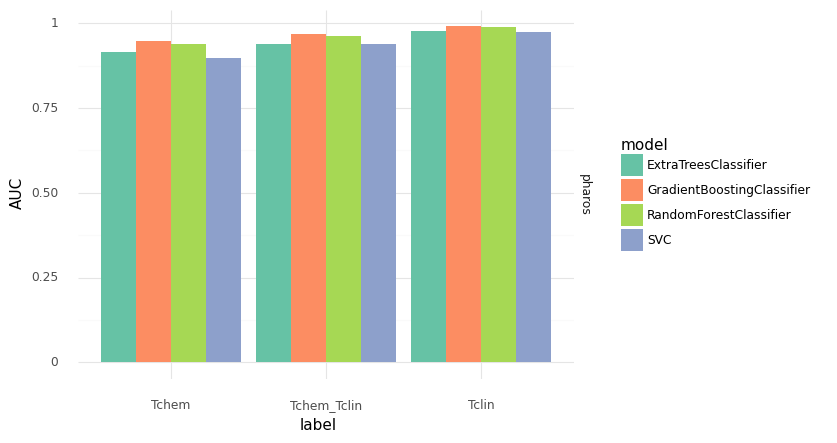

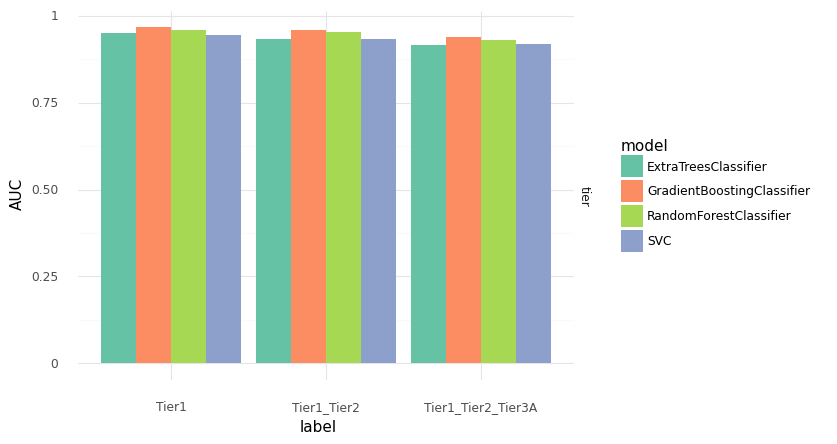

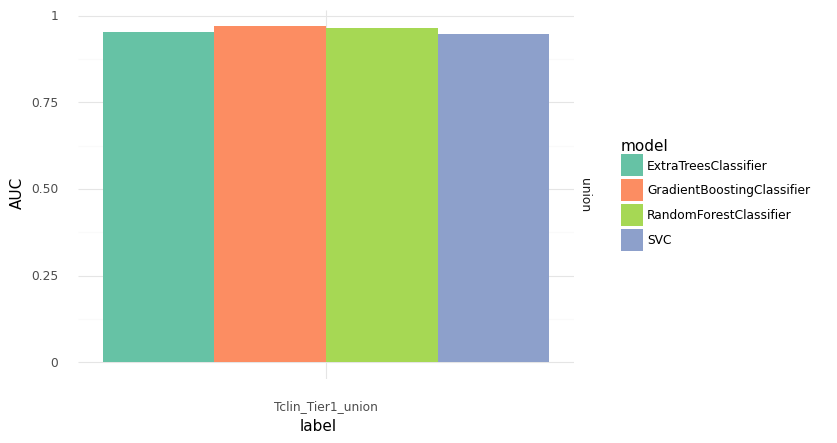

In [8]:
for genre in data.label_type.unique():
    dataset = data[data.label_type==genre]
    
    print(ggplot(dataset) + geom_col(aes(x='label', y='AUC', fill='model'), stat="identity", position='dodge')\
    + facet_grid("label_type~", scales="free", space="free") + theme_minimal() \
    + scale_fill_manual(values=['#66c2a5', '#fc8d62', '#a6d854', '#8da0cb']))

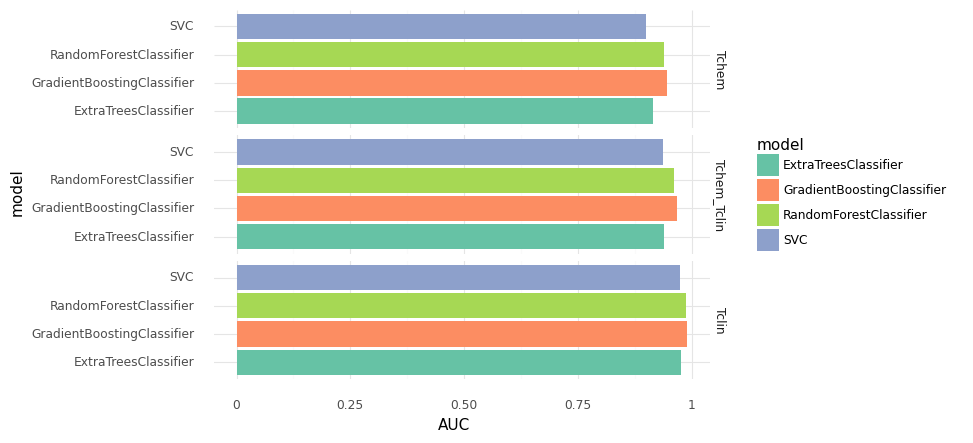

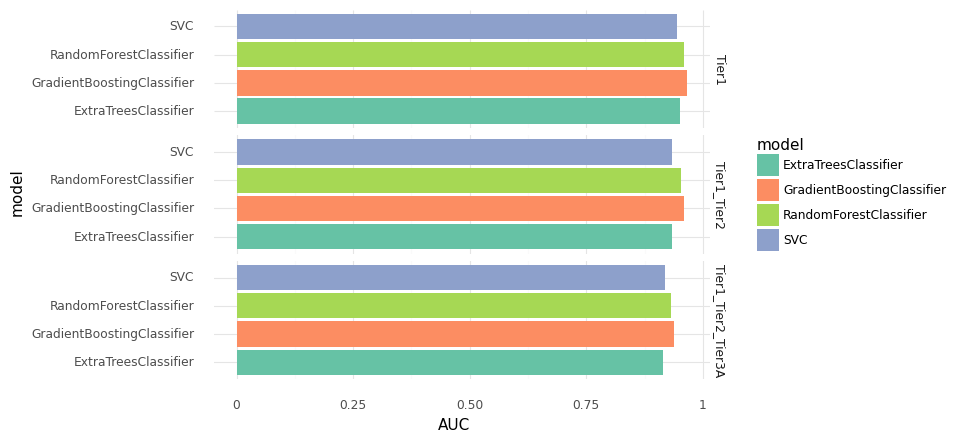

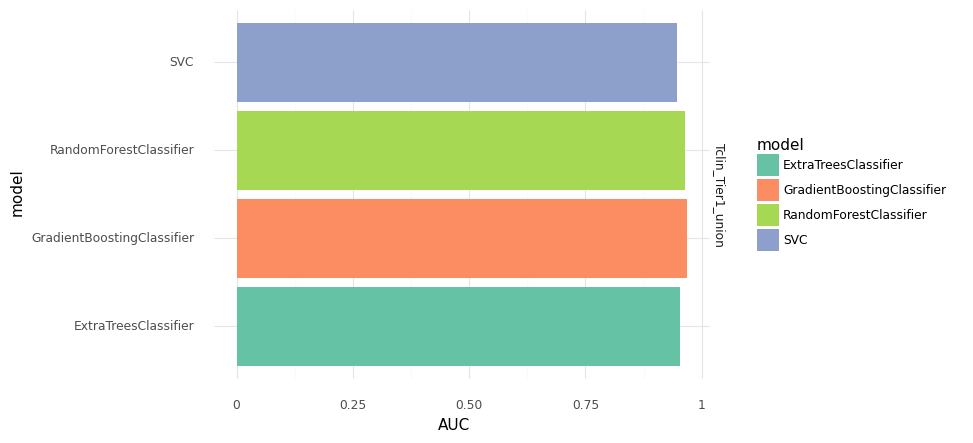

In [9]:
from plotnine import coord_flip
for genre in label_types:
    dataset = data[data.label_type==genre]
    
    print(ggplot(dataset) + geom_col(aes(x='model', y='AUC', fill='model'), stat="identity", position='dodge')\
    + facet_grid("label~", scales="free", space="free") + theme_minimal() \
    + scale_fill_manual(values=['#66c2a5', '#fc8d62', '#a6d854', '#8da0cb']) + coord_flip())

/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


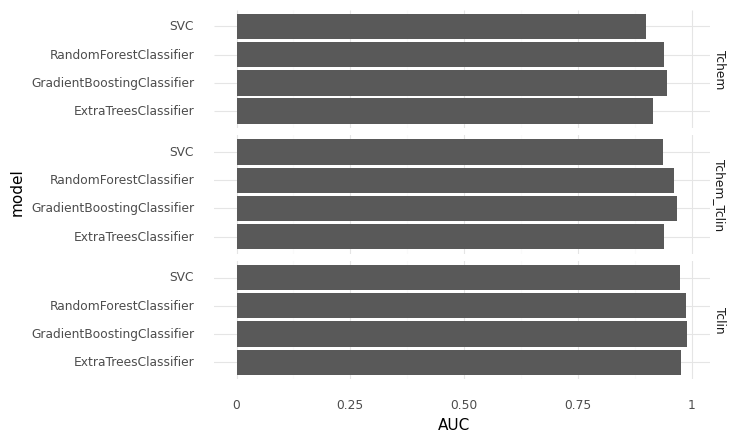

/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


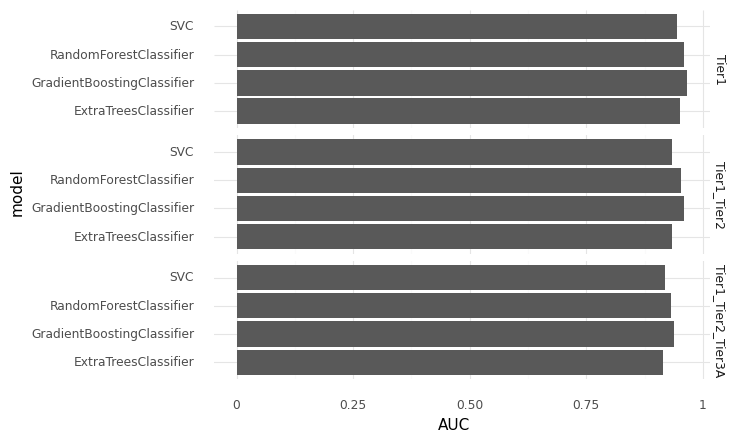

/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


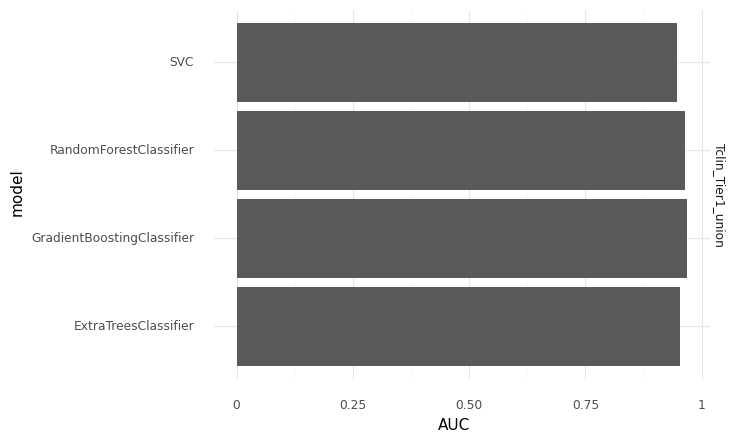

In [12]:
from plotnine import coord_flip
for genre in label_types:
    dataset = data[data.label_type==genre]
    
    print(ggplot(dataset) + geom_col(aes(x='model', y='AUC'), stat="identity", position='dodge')\
    + facet_grid("label~", scales="free", space="free") + theme_minimal() \
    + scale_fill_manual(values=["#999999", "#E69F00", "#56B4E9", 'green']) + coord_flip())

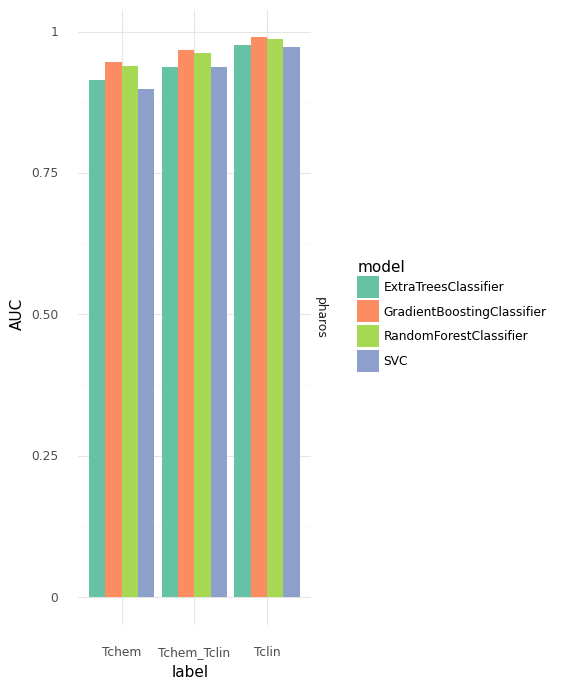

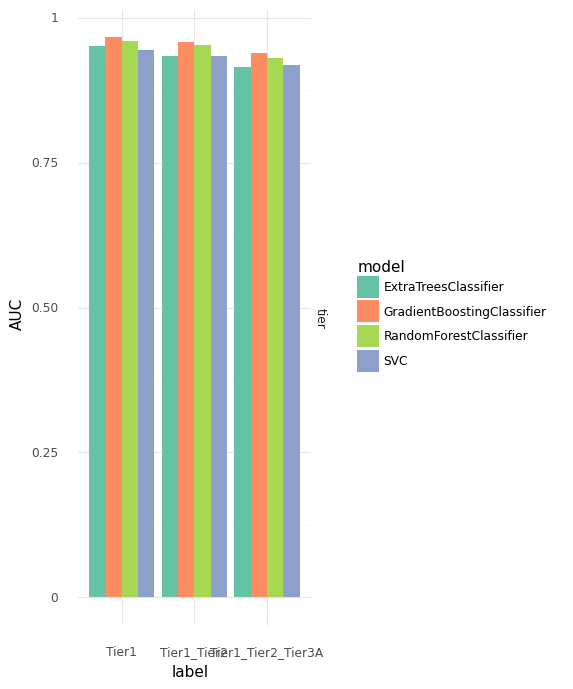

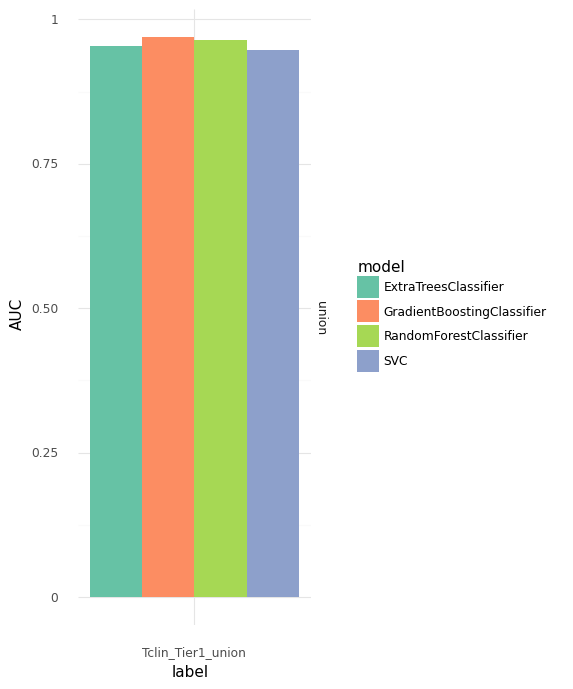

In [13]:
from plotnine import coord_flip
for genre in label_types:
    dataset = data[data.label_type==genre]
    
    print(ggplot(dataset) + geom_col(aes(x='label', y='AUC', fill='model'), stat="identity", position='dodge')\
    + facet_grid("label_type~", scales="free", space="free") + theme_minimal() \
    + scale_fill_manual(values=['#66c2a5', '#fc8d62', '#a6d854', '#8da0cb']) + theme(panel_spacing=0.5, figure_size=(3,8)))

/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


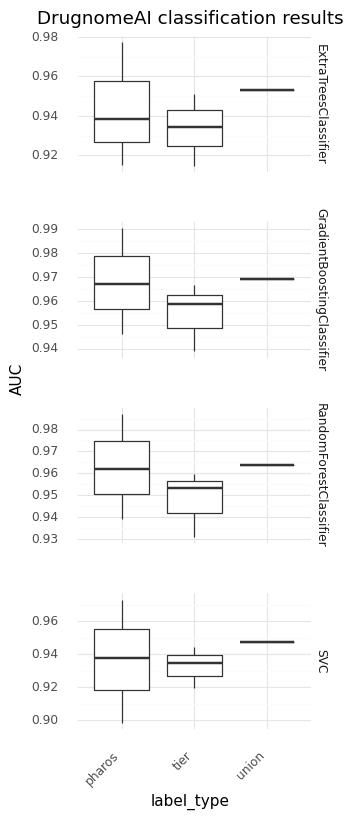

In [14]:
from plotnine import geom_boxplot
print(ggplot(data) + geom_boxplot(aes(x='label_type', y='AUC'))\
+ facet_grid("model~", scales="free", space="free") + theme_minimal()  \
    + scale_fill_manual(values=['#66c2a5', '#fc8d62', '#a6d854', '#8da0cb'])\
      + theme(panel_spacing=0.5, figure_size=(3,9)) \
#      + geom_text(aes(label="label")) \
     + theme(axis_text_x=element_text(rotation=45, hjust=1)) \
      + labs(title="DrugnomeAI classification results")  )

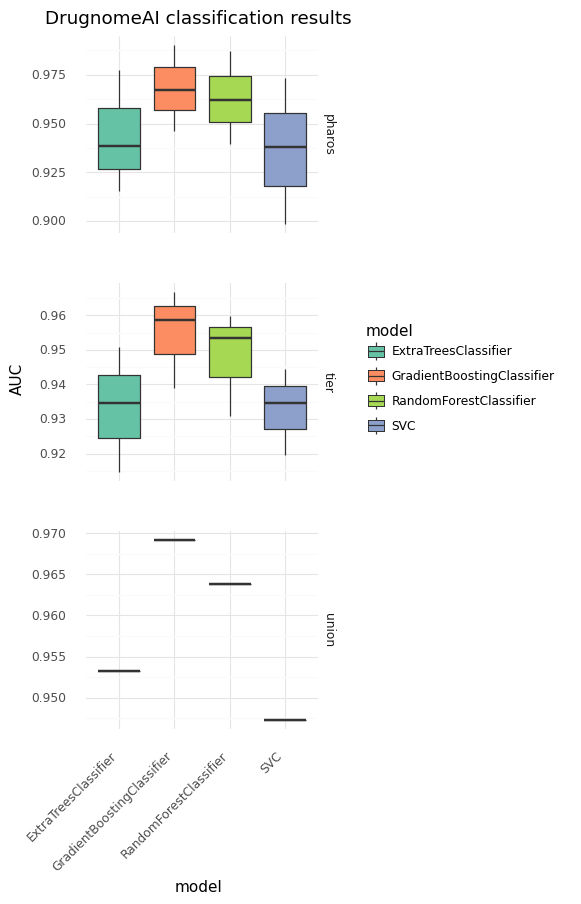

In [15]:
from plotnine import geom_boxplot
print(ggplot(data) + geom_boxplot(aes(x='model', y='AUC', fill='model'))\
+ facet_grid("label_type ~", scales="free", space="free") + theme_minimal()  \
    + scale_fill_manual(values=['#66c2a5', '#fc8d62', '#a6d854', '#8da0cb'])\
      + theme(panel_spacing=0.5, figure_size=(3,9)) \
#      + geom_text(aes(label="label")) \
     + theme(axis_text_x=element_text(rotation=45, hjust=1)) \
      + labs(title="DrugnomeAI classification results")  )

/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6 x 6 in image.
/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: auc_box.png
/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6 x 6 in image.
/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: auc_box.pdf


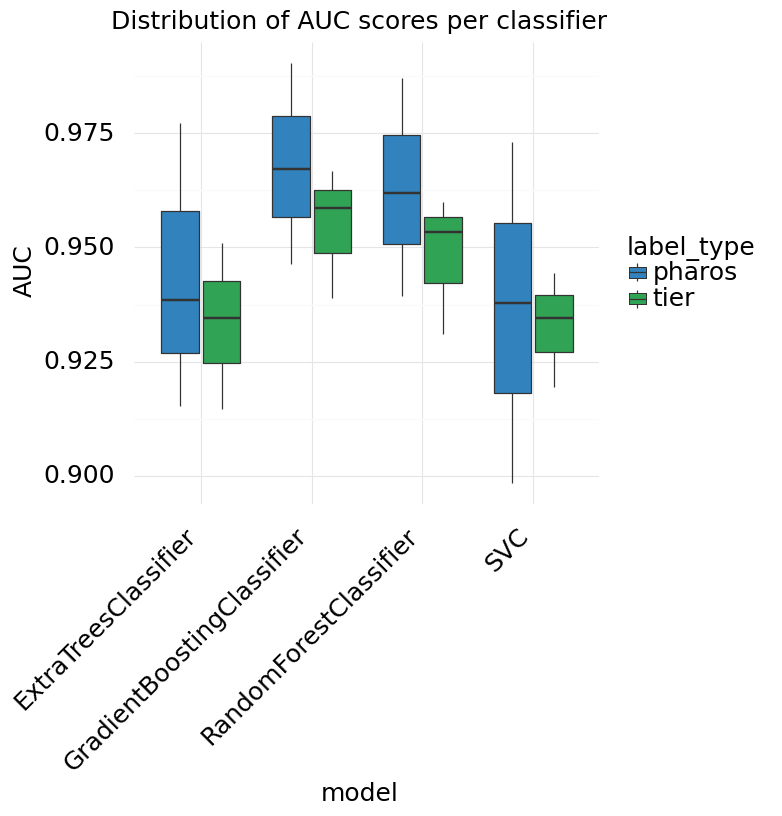

<ggplot: (8789889752203)>

In [13]:
from plotnine import geom_boxplot
data1 = data.loc[data['label_type'].isin(['pharos','tier'])]
p = ggplot(data1) + geom_boxplot(aes(x='model', y='AUC', fill='label_type'))\
+ theme_minimal()  \
+ scale_fill_manual(values=['#3182bd', '#31a354'])\
+ theme(panel_spacing=0.5, figure_size=(6,6)) \
+ theme(axis_text_x=element_text(rotation=45, hjust=1,size=18,color="black")) \
+ theme(axis_text_y=element_text(size=18,color="black")) \
+ theme(axis_title_y=element_text(size=18,color="black")) \
+ theme(axis_title_x=element_text(size=18,color="black")) \
+ theme(plot_title = element_text(size =18)) \
+ theme(legend_text=element_text(size=18)) \
+ theme(legend_title=element_text(size=18)) \
+ labs(title="Distribution of AUC scores per classifier")

ggsave(plot=p,filename="auc_box.png")
ggsave(plot=p,filename="auc_box.pdf")
p